# Ejercico de estudio

## Importacion y creacion de DataFrames

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn import tree
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df_train_inicial = pd.read_csv("playground-series-s4e6/train.csv")
df_testparcial_inicial = pd.read_csv("playground-series-s4e6/test.csv")
df_sample = pd.read_csv("playground-series-s4e6/sample_submission.csv")

In [4]:
df_test_inicial = df_testparcial_inicial.merge(right=df_sample, on="id")
df_test_inicial.head(2)

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,8,0,0,0.0,0,13.9,-0.3,0.79,Graduate
1,76519,1,1,1,9238,1,1,128.0,1,1,...,0,6,6,6,13.5,0,11.1,0.6,2.02,Graduate


In [5]:
df_train_inicial.head(2)

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout


## Preprocesamiento

* Análisis de varibles

In [6]:
df_train_inicial.info()
df_train_inicial.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,...,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,38258.500000,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,...,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,22088.988286,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,...,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,0.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,19129.250000,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,...,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,38258.500000,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,...,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,57387.750000,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,...,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,76517.000000,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,...,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000


In [7]:
df_test_inicial.isnull().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

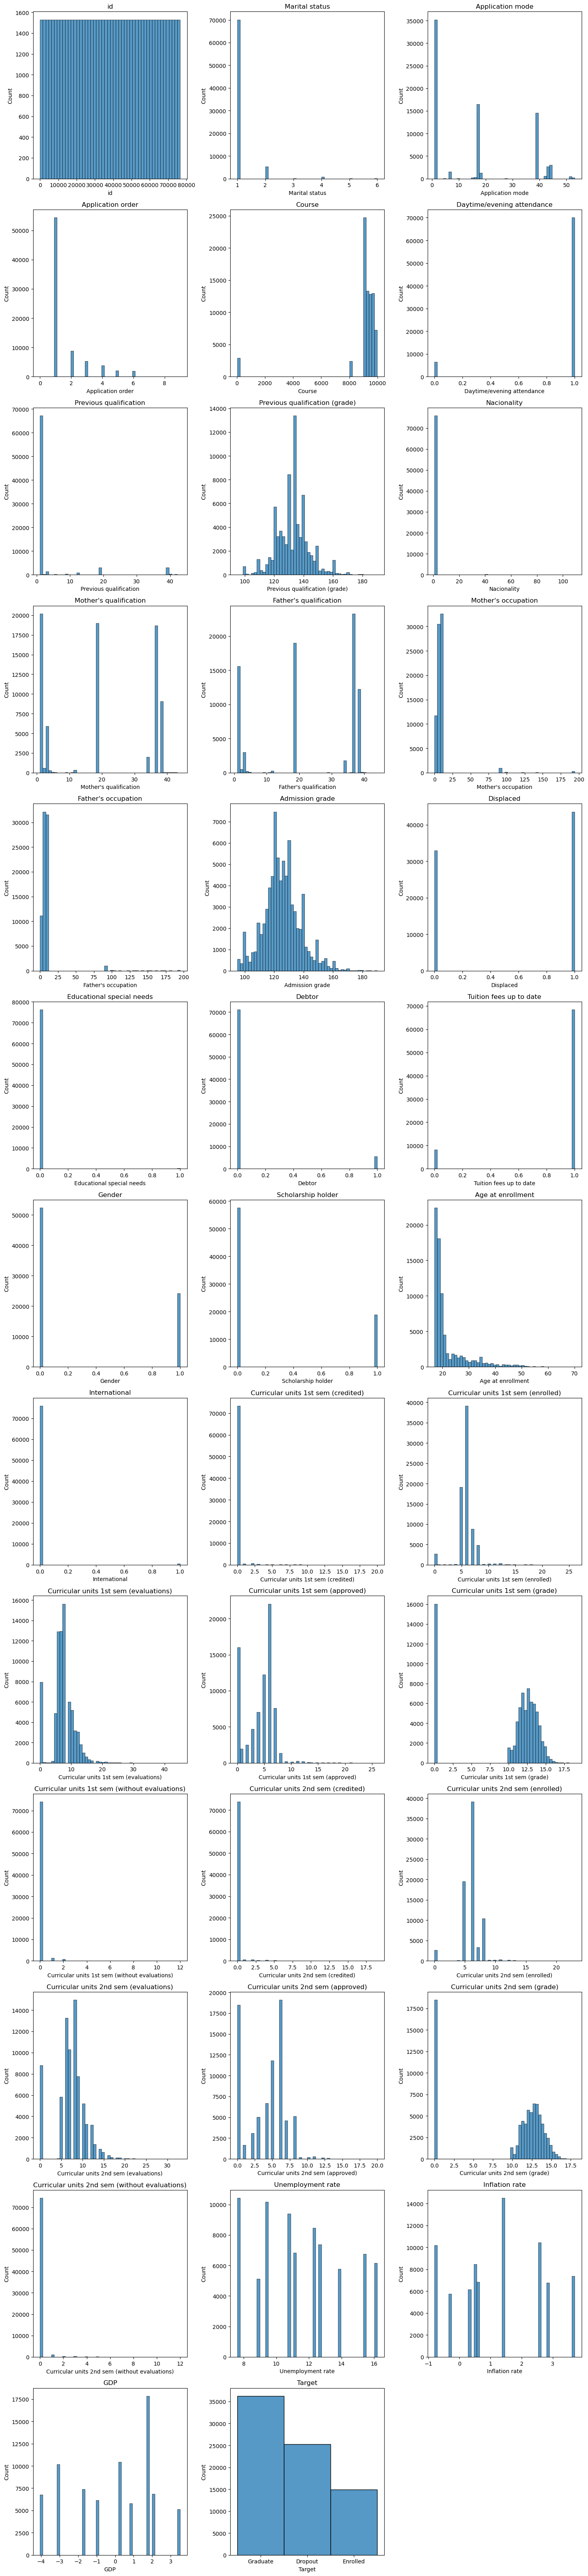

In [8]:
# Copiar el DataFrame y eliminar la columna "BodyFat"
df_graficas_iniciales = df_train_inicial.copy()

# Calcular el número de columnas y filas necesarias
num_columns = len(df_graficas_iniciales.columns)
num_rows = 16
num_cols_per_row = (num_columns + num_rows - 1) // num_rows  # Redondeo hacia arriba

# Ajustar el tamaño de la figura dinámicamente
figsize_x = num_cols_per_row * 5
figsize_y = num_rows * 5

fig, ax = plt.subplots(num_rows, num_cols_per_row, figsize=(figsize_x, figsize_y))


# Iterar sobre las columnas para crear los subgráficos
for idx, col in enumerate(df_graficas_iniciales.columns):
    row = idx // num_cols_per_row
    col_pos = idx % num_cols_per_row
    sns.histplot(df_graficas_iniciales.iloc[:, idx], ax=ax[row][col_pos], bins=50)
    ax[row][col_pos].set_title(df_graficas_iniciales.columns[idx])

# Eliminar los subgráficos vacíos
for i in range(num_columns, num_rows * num_cols_per_row):
    fig.delaxes(ax[i // num_cols_per_row][i % num_cols_per_row])

plt.tight_layout()
plt.show()

https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

In [9]:
# eliminar id, ya que no variara nada

df_train_primeralimpieza = df_train_inicial
df_train_primeralimpieza.drop(columns=["id"], inplace=True)

In [10]:
df_train_primeralimpieza['Target'] = df_train_primeralimpieza['Target'].astype(str)
df_train_primeralimpieza = pd.get_dummies(df_train_primeralimpieza)

In [11]:
df_train_primeralimpieza[df_train_primeralimpieza["Curricular units 1st sem (credited)"]>0].head(15).T

,25,42,71,80,83,93,98,116,119,122,135,189,238,273,307
Marital status,1,1,1,1,1,1,1,1,2,1,1,2,1,1,1
Application mode,7,44,53,44,44,51,44,44,43,53,43,39,42,51,43
Application order,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Course,8014,9085,9003,9238,9085,8014,9238,9119,8014,9085,9147,9003,9085,9070,9147
Daytime/evening attendance,0,1,1,1,1,0,1,1,0,1,1,1,1,1,1
Previous qualification,40,39,42,39,39,1,39,1,1,42,1,1,1,1,1
Previous qualification (grade),110.0,140.0,140.0,130.0,140.0,160.0,130.0,150.0,133.1,150.0,143.0,100.0,130.0,140.0,120.0
Nacionality,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Mother's qualification,37,19,38,3,1,38,3,3,37,1,37,37,2,3,34
Father's qualification,37,37,38,1,1,19,3,19,37,3,37,37,3,19,34


<Axes: >

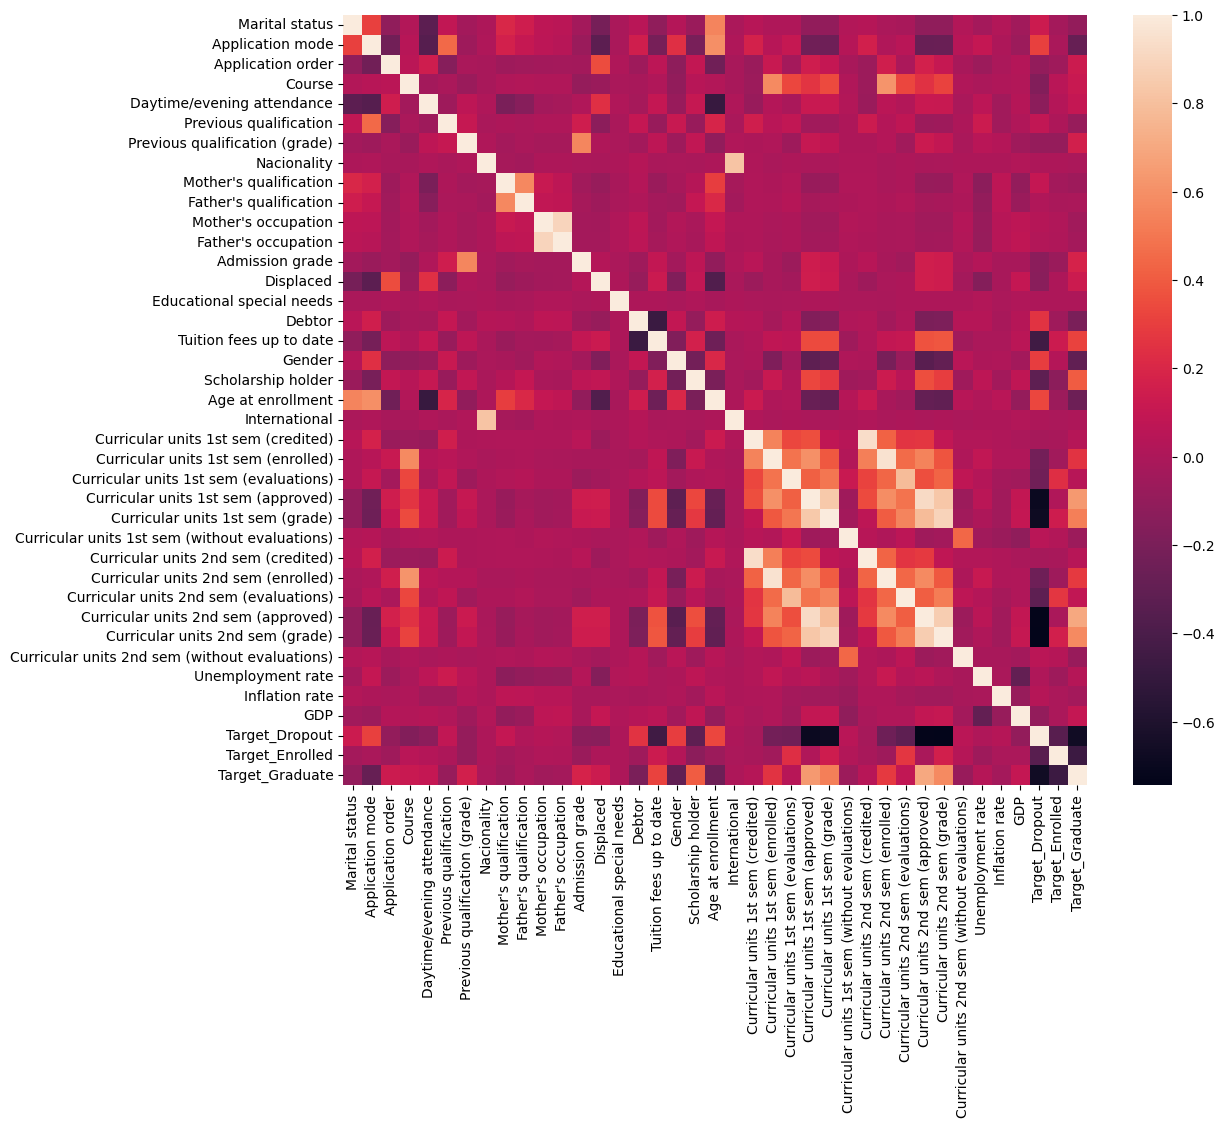

In [12]:
corrmat = df_train_primeralimpieza.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corrmat, fmt=".2f")

* antes de eliminar los poco relacionados probemos a juntar los que veamos que conforman matrices

In [13]:
df_train_primeralimpieza.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

In [14]:
df_train_segundalimpieza = df_train_inicial
df_train_segundalimpieza["parents occupation"] = df_train_segundalimpieza['Father\'s occupation'] *df_train_segundalimpieza['Mother\'s occupation'] / 2
df_train_segundalimpieza.drop(columns={'Mother\'s occupation', 'Father\'s occupation'}, inplace=True)

* sustancialmente creditos aprovados y acreditados son lo mismo, pero tiene mas valor aporbados pomr lo que elimino el otro

In [15]:
df_train_segundalimpieza.drop(columns={'Curricular units 1st sem (credited)', 'Curricular units 2nd sem (credited)' }, inplace=True)

* ya que hay numero de evaluaciones tomadas y numeor de asignaturas, creoq eu es importante si han tenido que recuperar y si han aprovado limpio, recuperando o le ha quedado, hay que jugar con esas columnas

In [16]:
import numpy as np

# Definir las condiciones y los valores correspondientes
conditions = [
    (df_train_segundalimpieza['Curricular units 1st sem (enrolled)'] == df_train_segundalimpieza['Curricular units 1st sem (evaluations)']) & 
    (df_train_segundalimpieza['Curricular units 1st sem (evaluations)'] == df_train_segundalimpieza['Curricular units 1st sem (approved)']),
    
    (df_train_segundalimpieza['Curricular units 1st sem (enrolled)'] == df_train_segundalimpieza['Curricular units 1st sem (approved)']) & 
    (df_train_segundalimpieza['Curricular units 1st sem (approved)'] < df_train_segundalimpieza['Curricular units 1st sem (evaluations)']),
    
    (df_train_segundalimpieza['Curricular units 1st sem (enrolled)'] > df_train_segundalimpieza['Curricular units 1st sem (approved)']) & 
    (df_train_segundalimpieza['Curricular units 1st sem (approved)'] < df_train_segundalimpieza['Curricular units 1st sem (evaluations)']),
    
    (df_train_segundalimpieza['Curricular units 1st sem (evaluations)'] <= df_train_segundalimpieza['Curricular units 1st sem (enrolled)']) & 
    (df_train_segundalimpieza['Curricular units 1st sem (enrolled)'] > df_train_segundalimpieza['Curricular units 1st sem (approved)'])
]

values = ['pasa limpio norecu1', 'pasa limpio recu1', 'no pasa limpio1', 'no pasa abandono1']

# Crear la nueva columna usando np.select()
df_train_segundalimpieza["passed_accuracy_1"] = np.select(conditions, values, default=np.nan)
# Definir las condiciones y los valores correspondientes
conditions = [
    (df_train_segundalimpieza['Curricular units 2nd sem (enrolled)'] == df_train_segundalimpieza['Curricular units 2nd sem (evaluations)']) & 
    (df_train_segundalimpieza['Curricular units 2nd sem (evaluations)'] == df_train_segundalimpieza['Curricular units 2nd sem (approved)']),
    
    (df_train_segundalimpieza['Curricular units 2nd sem (enrolled)'] == df_train_segundalimpieza['Curricular units 2nd sem (approved)']) & 
    (df_train_segundalimpieza['Curricular units 2nd sem (approved)'] < df_train_segundalimpieza['Curricular units 2nd sem (evaluations)']),
    
    (df_train_segundalimpieza['Curricular units 2nd sem (enrolled)'] > df_train_segundalimpieza['Curricular units 2nd sem (approved)']) & 
    (df_train_segundalimpieza['Curricular units 2nd sem (approved)'] < df_train_segundalimpieza['Curricular units 2nd sem (evaluations)']),
    
    (df_train_segundalimpieza['Curricular units 2nd sem (evaluations)'] <= df_train_segundalimpieza['Curricular units 2nd sem (enrolled)']) & 
    (df_train_segundalimpieza['Curricular units 2nd sem (enrolled)'] > df_train_segundalimpieza['Curricular units 2nd sem (approved)'])
]

values = ['pasa limpio norecu2', 'pasa limpio recu2', 'no pasa limpio2', 'no pasa abandono2']

# Crear la nueva columna usando np.select()
df_train_segundalimpieza["passed_accuracy_2"] = np.select(conditions, values, default=np.nan)



df_train_segundalimpieza.drop(columns={'Curricular units 1st sem (enrolled)','Curricular units 1st sem (evaluations)',  'Curricular units 1st sem (approved)'}, inplace=True)
df_train_segundalimpieza.drop(columns={'Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)',  'Curricular units 2nd sem (approved)'}, inplace=True)
